# Тема: Курсовая работа

## Тема. Прогноз цен на недвижимость с использованием Scikit-learn



### Часть 1. Импортируем необходимые библиотеки

In [2655]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.image as img
import matplotlib.pyplot as plt

import seaborn as sns
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6                      # меняем размер графиков по умолчанию

### Часть 2. Загружаем исходные данные для работы

Загрузка обучающего и контрольного датасета

In [2656]:
TRAIN_DATASET = 'train.csv'                              # входной файл с обучающей подборкой
TEST_DATASET = 'test.csv'                                # входной файл с контрольной подборкой 

TRAIN_DATASET_CLEARED = 'train_cleared.csv'              # промежуточный файл с очищенной обучающей подборкой
TEST_DATASET_CLEARED = 'test_cleared.csv'                # промежуточный файл с очищенной тестовой подборкой

PRED_DATASET_LINEAR = 'pred_linear.csv'                  # выходной файл с прогнозом цен по алгоритму линейной регрессии 
PRED_DATASET_DECISION_TREE = 'pred_decision_tree.csv'    # выходной файл с прогнозом цен по алгоритму дереву решений
PRED_DATASET_RANDOM_FOREST = 'pred_random_forest.csv'    # выходной файл с прогнозом цен по алгоритму RandomForest 

df = pd.read_csv(TRAIN_DATASET)
dt = pd.read_csv(TEST_DATASET)

**Загрузка датасета**

Статистические данные о стоимости квартир по тестовой выборке.

* **ID** - идентификатор
* **District** - район
* **Rooms** - количество комнат
* **Square** - общая площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - этажность дома
* **HouseYear** - год постройки
* **Ecology_1** - экология 1
* **Ecology_2** - экология 2
* **Ecology_3** - экология 3
* **Social_1** - социальная среда 1
* **Social_2** - социальная среда 2
* **Social_3** - социальная среда 3
* **Healthcare_1** - здравоохранение 1
* **Healthcare_2** - здравоохранение 2
* **Shops_1** - магазины 1
* **Shops_2** - магазины 2
* **Price** - стоимость дома

Обучающий датасет

In [2657]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [2658]:
df.shape

(10000, 20)

In [2659]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Контрольный датасет

In [2660]:
dt.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [2661]:
dt.shape

(5000, 19)

In [2662]:
dt.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

### Часть 3. Анализ и очистка загруженных данных

#### Обнаруженные ошибки, выбросы и пропуски в датасетах:

- существуют квартиры с 0 комнат (значение min в выборке);
- минимальная площадь квартиры 1,13 м2;
- минимальная жилая площадь 0,37 м2;
- максимальная жилая площадь 7480 м2 превышает максимальную общую площадь 641м2;
- минимальная площадь кухни 0 м2;
- максимальная площадь кухни 2014 м2;
- минимальная этажность дома 0 этажей;
- из 10 тысяч значений жилая площадь определена только в 7887;
- из 10 тысяч значений 1-й показатель здравоохранения определен только в 5202 записях;


#### Обработка квартир с нулевым количеством комнат (Rooms = 0)
Очищаем выбросы в поле Rooms, заменяя нулевое количество комнат в квартире на медианное значение

In [2663]:
df[df['Rooms'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [2664]:
df.loc[df['Rooms'] == 0, 'Rooms'] = df['Rooms'].median()

In [2665]:
df['Rooms'].value_counts()

2.0     3888
1.0     3705
3.0     2235
4.0      150
5.0       18
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [2666]:
dt[dt['Rooms'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B


In [2667]:
dt.loc[dt['Rooms'] == 0, 'Rooms'] = dt['Rooms'].median()

In [2668]:
dt['Rooms'].value_counts()

2.0     2032
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
17.0       1
Name: Rooms, dtype: int64

Приводим количество комнат к целому виду

In [2669]:
df['Rooms'] = df['Rooms'].astype(int)
df['Rooms'].dtype

dtype('int64')

In [2670]:
dt['Rooms'] = dt['Rooms'].astype(int)
dt['Rooms'].dtype

dtype('int64')

#### Обработка ошибок в данных по площади и жилой площади (Square, LifeSquare)
Находим в датафрейме ошибки - строк, где жилая площадь превышает общую площадь недвижимости и обмениваем такие значения местами, так как в большинстве данных видно, что это скорее всего ошибки при вводе, так как показатели очень близки.

In [2671]:
df[df['Square'] < df['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,41,30,2,59.015896,59.439082,12.0,5,5.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B,126281.142781
9889,12918,23,2,51.440463,53.134243,51.0,3,17.0,2017,0.005767,B,B,1,388,0,NaN,0,0,B,88150.012510
9895,2737,27,3,123.430072,125.806981,123.0,5,10.0,2015,0.017647,B,B,2,469,0,NaN,0,0,B,234194.837047
9902,14001,73,1,44.098768,44.267551,1.0,7,24.0,2014,0.042032,B,B,37,6856,84,1940.0,2,5,B,381937.404161


In [2672]:
df['SquareAlternate']=df['Square']
df['LifeSquareAlternate']=df['LifeSquare']
df.loc[(df['LifeSquareAlternate'] >= df['SquareAlternate']), 'Square'] = df['LifeSquareAlternate']
df.loc[(df['LifeSquareAlternate'] >= df['SquareAlternate']), 'LifeSquare'] = df['SquareAlternate']
df.drop(['SquareAlternate', 'LifeSquareAlternate'], axis='columns', inplace=True)
df[df['Square'] < df['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [2673]:
dt[dt['Square'] < dt['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2,5480,190,1,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
27,11160,58,1,48.610661,48.752502,1.0,4,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
39,6624,27,1,42.413793,42.434887,10.0,12,17.0,2017,0.011654,B,B,4,915,0,NaN,0,0,B
43,11513,1,1,37.484057,40.593036,0.0,4,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
70,1872,30,2,52.449057,52.798349,1.0,17,17.0,2016,0.000078,B,B,22,6398,141,1046.0,3,23,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,14686,1,3,77.229885,79.958685,1.0,18,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
4951,3711,94,1,41.281057,42.392594,10.0,13,13.0,2014,0.282798,B,B,33,8667,2,NaN,0,6,B
4962,5820,94,1,33.680382,34.198977,1.0,10,9.0,1972,0.127376,B,B,43,8429,3,NaN,3,9,B
4969,4821,74,2,82.542507,82.585069,0.0,4,17.0,2015,0.309479,B,B,35,7715,4,990.0,0,6,B


In [2674]:
dt['SquareAlternate'] = dt['Square']
dt['LifeSquareAlternate'] = dt['LifeSquare']
dt.loc[(dt['LifeSquareAlternate'] >= dt['SquareAlternate']), 'Square'] = dt['LifeSquareAlternate']
dt.loc[(dt['LifeSquareAlternate'] >= dt['SquareAlternate']), 'LifeSquare'] = dt['SquareAlternate']
dt.drop(['SquareAlternate', 'LifeSquareAlternate'], axis='columns', inplace=True)
dt[dt['Square'] < dt['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


Введем дополнительный расчетный параметр стоимость квадратного метра, чтобы найти вбросы и явные отклонения площади или стоимости, когда стоимость квадратного метра будет очень высокая или очень низкая

In [2675]:
df['PricePerM2'] = df['Price']/df['Square']

In [2676]:
df['PricePerM2'].describe()

count     10000.000000
mean       3940.656780
std        2649.200689
min          29.056188
25%        2910.143388
50%        3906.211514
75%        4690.476112
max      173482.532048
Name: PricePerM2, dtype: float64

In [2677]:
df[df['PricePerM2']<500]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,PricePerM2
4262,28,9,2,604.705972,NaN,1.0,17,18.0,1977,0.161532,...,B,25,5648,1,30.0,2,4,B,187717.242538,310.427301
4328,16550,27,3,7480.592129,81.694417,1.0,9,17.0,2016,0.017647,...,B,2,469,0,NaN,0,0,B,217357.492366,29.056188
4690,2307,102,1,410.639749,409.425181,10.0,4,4.0,2016,0.238617,...,B,26,3889,6,705.0,3,6,B,90470.430830,220.315814
6977,11602,30,2,641.065193,638.163193,10.0,20,19.0,2019,0.000078,...,B,22,6398,141,1046.0,3,23,B,133529.681562,208.293451


Внимательно посмотрев на записи выше, можно сделать вывод, что во всех этих записях очень большая площадь при в целом адекватной стоимости и прочих параметров. Делаем вывод, что это ошибка в знаках при заполнении общей площади (при этом в одной записи - ошибка в 2 знаках). Делаем соответствующие исправления, предварительно обратив внимание на жилую площадь, которая также в части записей не определена, а в части - завышена. Поэтому до начала изменения разрядов общей площади приравниваем жилую площадь к общей и осуществляем с ней аналогичные преобразования (изменение знаков. В конце проверяем остались ли аномальные выбросы с увеличенными площадями, немного увеличив отсекающее значение за 1 м2.

In [2678]:
df.loc[df['PricePerM2']<500, 'LifeSquare'] = df['Square'] 
df.loc[df['PricePerM2']<500, 'Square'] = df['Square']*0.1 
df.loc[df['PricePerM2']<500, 'LifeSquare'] = df['LifeSquare']*0.1 
df['PricePerM2'] = df['Price']/df['Square']

# повторяем операцию для оставщегося вброса с ошибкой в 2 знака
df.loc[df['PricePerM2']<500, 'Square'] = df['Square']*0.1   
df.loc[df['PricePerM2']<500, 'LifeSquare'] = df['LifeSquare']*0.1
df['PricePerM2'] = df['Price']/df['Square']

# проверяем, что все вбросы c завышенными площадями, не соответствующими стоимости исчезли
df[df['PricePerM2']<800]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,PricePerM2
590,14990,23,2,263.542020,48.449873,5.0,6,5.0,1972,0.075779,...,B,6,1437,3,NaN,0,2,B,141780.231857,537.979605
696,7590,113,3,94.417148,56.749169,11.0,6,18.0,2008,0.050756,...,B,24,5469,1,145.0,0,1,B,71057.273346,752.588644
6332,8961,27,1,164.153360,33.398983,6.0,3,5.0,1965,0.211401,...,B,9,1892,0,NaN,0,1,B,104891.073757,638.982193


In [2679]:
df[df['Square'] > 500]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,PricePerM2


Проверим контрольную выборку

In [2680]:
dt[dt['Square'] > 500]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


Видим что в оставшихся строках дешевые квартиры с большой площадью, но диапазон цен и площадей в целом адекватный. Учитывая старый год постройки этих квартир, возможно это адекватная цена за данные квартиры. Также проверили - остались ли в выборке квартиры с неадекватно большими площадями. Больше ничего не делаем.

In [2681]:
# посмотрели что аномальная граница площади проходит при цене за кв.метр около 12 000 за м2 и отобрали соответствующие значение,
# посчитав их аномальными
df[df['PricePerM2']>12000]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,PricePerM2
1316,11526,27,1,4.633498,1.969969,1.0,18,1.0,1977,0.011654,...,B,4,915,0,NaN,0,0,B,107604.269441,23223.115671
1608,10202,6,1,4.604943,2.596351,1.0,3,25.0,2014,0.243205,...,B,5,1564,0,540.0,0,0,B,137597.601458,29880.413376
3413,9487,5,1,5.549458,5.129222,1.0,1,1.0,1977,0.150818,...,B,16,3433,4,2643.0,4,5,B,369472.403061,66578.108364
4853,3224,27,2,2.377248,0.873147,0.0,1,0.0,1977,0.017647,...,B,2,469,0,NaN,0,0,B,126596.941798,53253.578837
4900,4504,27,3,5.610772,4.390331,1.0,8,19.0,2016,0.211401,...,B,9,1892,0,NaN,0,1,B,161379.067034,28762.363095
6392,14786,1,1,4.525736,1.136859,1.0,3,1.0,1977,0.007122,...,B,1,264,0,NaN,0,1,B,181434.825589,40089.576674
8283,15744,34,1,2.642219,1.988943,1.0,21,4.0,1977,0.069753,...,B,53,13670,4,NaN,1,11,B,458378.777006,173482.532048
9294,6782,45,1,5.257278,2.954309,1.0,3,1.0,1977,0.195781,...,B,23,5212,6,NaN,3,2,B,438005.182323,83314.054015
9613,7657,38,1,4.618547,4.502784,1.0,28,1.0,1977,0.060753,...,B,15,2787,2,520.0,0,7,B,483283.488083,104639.730264


Из отобранных данных обращаем внимание на аномально низкие площади - во всех записях менее 6м2, что скорее всего невозможно для проживания, при том что цены на квартиры лежат в целом в приемлемом диапазоне цен и делаем вывод что в этих записях ошибка в разряде в меньшую сторону. Поэтому проделываем обратную манипуляцию (увеличиваем разряд на 1 знак). Так как жилая площадь в данной выборке в целом является логичной (несколько меньше общей площади), то ее значение такж просто увеличиваем на один знак и проверяем остались ли вбросы немного уменьшив отсекающее значение стоимости за 1 м2.

In [2682]:
df.loc[df['PricePerM2']>12000, 'Square'] = df['Square']*10 
df.loc[df['PricePerM2']>12000, 'LifeSquare'] = df['LifeSquare']*10 
df['PricePerM2'] = df['Price']/df['Square']

# повторяем операцию для оставщегося вброса с ошибкой в 2 знака
df.loc[df['PricePerM2']>12000, 'Square'] = df['Square']*10 
df.loc[df['PricePerM2']>12000, 'LifeSquare'] = df['LifeSquare']*10 
df['PricePerM2'] = df['Price']/df['Square']

# проверяем, что все вбросы c заниженными площадями, не соответствующими стоимости исчезли
df[df['PricePerM2']>10500]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,PricePerM2
896,6036,95,1,46.248238,NaN,0.0,5,0.0,1977,0.000699,...,B,14,3369,24,4129.0,0,3,B,516315.770611,11164.009578
2554,10919,190,2,47.489415,35.564479,4.0,5,5.0,1918,0.000000,...,B,30,7538,87,4702.0,5,5,B,537979.657509,11328.412026
4764,11013,43,2,58.757047,34.605286,8.0,12,17.0,2004,0.000078,...,B,22,6398,141,1046.0,3,23,B,625678.644994,10648.571986
5202,2018,94,1,33.521641,30.155171,1.0,17,16.0,2015,0.282798,...,B,33,8667,2,NaN,0,6,B,381912.162109,11393.003236
7053,7931,181,1,34.911269,18.433155,6.0,10,12.0,1955,0.000000,...,B,8,1423,37,562.0,1,8,B,397528.736061,11386.831424
9370,8396,202,2,42.353485,30.661180,6.0,4,6.0,1933,0.000000,...,B,30,7538,87,4702.0,5,5,B,502085.860162,11854.652892


В целом видим, что все оставшиеся квартиры имеют адекватную площадь при достаточно высокой стоимости. Можно предположить, что это какие-то уникальные объекты. Удаляем вспомогательный столбец, так как его нельзя построить в контрольной выборке из-за отсутствия цен. Проверим остались ли у нас в выборке квартиры с аномально низкими площадями и если все ок,то переходим к контрольной выборке. 

In [2683]:
df.drop(['PricePerM2'], axis='columns', inplace=True)
df[df['Square'] < 10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Проверим контрольную выборку

In [2684]:
dt[dt['Square'] < 10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
66,9011,53,1,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
608,16401,30,1,4.338755,2.645046,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
837,2138,27,1,5.647458,1.501582,1.0,1,1.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
1165,10120,6,1,5.100672,3.861780,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
4490,1165,27,1,2.372101,1.899119,1.0,2,17.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B
4540,7855,6,1,4.967143,2.968086,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,540.0,0,0,B
4902,1420,45,1,2.900371,1.975769,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B


In [2685]:
# с большой вероятностью заниженные (менее 10м2) жилые площади в контрольной выборке являются вбросом, 
# поэтому также как и в обучающей увеличиваем разрядность этих значений
dt.loc[dt['Square']<10, 'Square'] = dt['Square']*10 
dt.loc[dt['Square']<10, 'LifeSquare'] = dt['LifeSquare']*10 


Чтобы завершить обработку значений общей и жилой площадей, расчитаем среднее отношение жилой площади к общей и применим этот коэффициент к отсутствующим значениям.

In [2686]:
K = df['LifeSquare'].mean()/df['Square'].mean()
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['Square']*K 
dt.loc[dt['LifeSquare'].isnull(), 'LifeSquare'] = dt['Square']*K 

Проверим также аномальные отношения общей и жилой площади, где жилая площадь в 10 раз меньше общей и увеличим разрядность, так как скорее всего это ошибка данных

In [2687]:
df[df['LifeSquare']/df['Square'] < 0.1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
26,4378,27,3,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
95,4280,34,2,61.334968,4.091945,1.0,26,1.0,2014,0.069753,B,B,53,13670,4,NaN,1,11,B,286564.441972
134,12613,6,2,65.496674,5.589324,1.0,5,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,180727.643541
158,16779,27,3,51.991064,4.896202,1.0,22,25.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,174687.566186
160,3522,6,1,66.419841,3.987101,1.0,2,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,193361.229815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9748,14053,27,2,56.564445,2.616535,1.0,7,12.0,2015,0.011654,B,B,4,915,0,NaN,0,0,B,141086.005616
9756,13583,27,2,58.943039,3.319486,1.0,11,17.0,2017,0.011654,B,B,4,915,0,NaN,0,0,B,142789.948977
9813,2040,62,1,122.438148,5.751401,1.0,2,3.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,224900.897679
9828,13630,24,3,127.141143,4.811405,1.0,3,1.0,2017,0.111627,B,B,50,12238,8,1970.0,2,3,B,611250.912034


In [2688]:
dt[dt['LifeSquare']/dt['Square'] < 0.1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
18,3495,27,3,82.652818,5.690155,1.0,4,17.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A
66,9011,53,1,13.785426,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
71,9205,120,2,85.911827,4.188395,1.0,5,1.0,2016,0.341072,B,B,27,5664,48,2300.0,3,11,B
77,7034,45,2,59.927502,3.798341,1.0,23,1.0,2017,0.195781,B,B,23,5212,6,NaN,3,2,B
78,6553,34,5,122.375273,0.333490,0.0,9,0.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4818,8963,27,3,79.114387,3.329216,1.0,3,22.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
4846,5002,1,3,82.624843,4.379317,1.0,5,17.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B
4863,4611,27,2,76.709543,2.989508,1.0,13,12.0,2016,0.072158,B,B,2,629,1,NaN,0,0,A
4902,1420,45,1,29.003714,1.975769,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B


In [2689]:
df.loc[df['LifeSquare']/df['Square'] < 0.1, 'LifeSquare'] = df['LifeSquare']*10 
df.loc[df['LifeSquare']/df['Square'] < 0.1, 'LifeSquare'] = df['LifeSquare']*10 
dt.loc[dt['LifeSquare']/dt['Square'] < 0.1, 'LifeSquare'] = dt['LifeSquare']*10 
dt.loc[dt['LifeSquare']/dt['Square'] < 0.1, 'LifeSquare'] = dt['LifeSquare']*10 

In [2690]:
Districts = list(range(df['DistrictId'].min(),df['DistrictId'].max()))
for i in Districts:   
    # определим минимальный номер поликлинки в районе
    ClinicNo = df[df['DistrictId'] == i]['Healthcare_1'].min()
    # если в районе нет ни одной поликлиники (ClicNo == NaN), то присвоим ей номер 0
    if ClinicNo != ClinicNo: 
        ClinicNo = 0
    df.loc[(df['DistrictId'] == i) & (df['Healthcare_1'].isnull()),'Healthcare_1'] = ClinicNo
    
df[df['Healthcare_1'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [2691]:
Districts = list(range(dt['DistrictId'].min(),dt['DistrictId'].max()))
for i in Districts:   
    # определим минимальный номер поликлинки в районе
    ClinicNo = dt[dt['DistrictId'] == i]['Healthcare_1'].min()
    # если в районе нет ни одной поликлиники (ClicNo == NaN), то присвоим ей номер 0
    if ClinicNo != ClinicNo: 
        ClinicNo = 0
    dt.loc[(dt['DistrictId'] == i) & (dt['Healthcare_1'].isnull()),'Healthcare_1'] = ClinicNo
    
dt[dt['Healthcare_1'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


#### Обработка столбца KitchenSquare (Площадь кухни)

Очищаем выбросы в поле KitchenSquare. Изучив данные,видим что в выборках встречаются аномальные значения площадей кухни (более 50м2), существенно превышающие общую площадь и разумные значения. Поэтому просто понизим разрядность этих значений, приняв эти вбросы за ошибку разрядности, что должно нам дать объективную картинку. Проделаем данную операцию 2 раза, так как в некоторых параметрах ошибка в 2 разрядах

In [2692]:
df[df['KitchenSquare'] >= 50.0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
227,16395,2,3,79.722243,44.731219,72.0,12,16.0,1987,0.130618,B,B,39,10418,9,900.0,1,9,B,370148.625285
1064,14656,62,1,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,2300.0,0,0,A,108337.484207
1369,2371,27,2,68.841073,64.234956,66.0,4,2.0,2014,0.017647,B,B,2,469,0,0.0,0,0,B,189244.249909
1455,12507,54,2,79.810535,79.578961,78.0,10,15.0,2014,0.006076,B,B,30,5285,0,645.0,6,6,B,438708.707579
1860,4265,161,2,53.216778,32.644859,53.0,7,17.0,1994,0.000699,B,B,14,3369,24,4129.0,0,3,B,261125.669724
2916,12390,72,3,99.323558,97.490674,96.0,22,25.0,2019,0.210473,B,B,11,2398,2,1994.0,3,0,B,445074.956552
2969,7441,62,3,114.734473,112.589083,112.0,3,3.0,2015,0.072158,B,B,2,629,1,2300.0,0,0,A,315245.521059
4079,6508,23,2,67.146049,33.959154,63.0,5,17.0,2019,0.034656,B,B,0,168,0,0.0,0,0,B,193130.585871
4110,299,27,2,66.787523,64.616662,60.0,14,20.0,2015,0.017647,B,B,2,469,0,0.0,0,0,B,179466.094235
4651,12552,58,3,116.405693,113.109653,112.0,3,3.0,2016,0.437885,B,B,23,5735,3,1084.0,0,5,B,296165.936689


In [2693]:
dt[dt['KitchenSquare'] >= 50.0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
40,5428,27,2,62.326044,39.768788,61.0,12,17.0,1977,0.072158,B,B,2,629,1,0.0,0,0,A
1456,5260,73,3,69.358242,51.247581,65.0,6,6.0,1931,0.042032,B,B,37,6856,84,1940.0,2,5,B
1777,3341,62,3,112.247841,112.114019,112.0,3,3.0,2017,0.072158,B,B,2,629,1,2300.0,0,0,A
1964,14594,11,2,42.795304,24.223770,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,1015.0,2,5,B
3816,12612,27,2,60.988496,33.646726,60.0,5,17.0,2013,0.072158,B,B,2,629,1,0.0,0,0,A
4281,8015,27,1,66.099096,33.639611,62.0,3,7.0,2016,0.014058,B,B,1,290,0,0.0,0,0,B
4405,5199,27,2,61.647531,59.054990,57.0,13,12.0,2016,0.211401,B,B,9,1892,0,0.0,0,1,B
4555,12640,6,2,54.629142,31.486308,97.0,4,17.0,2015,0.243205,B,B,5,1564,0,540.0,0,0,B


In [2694]:
df.loc[df['KitchenSquare'] > 50, 'KitchenSquare'] = df['KitchenSquare']*0.1
df.loc[df['KitchenSquare'] > 50, 'KitchenSquare'] = df['KitchenSquare']*0.1
dt.loc[dt['KitchenSquare'] > 50, 'KitchenSquare'] = dt['KitchenSquare']*0.1
dt.loc[dt['KitchenSquare'] > 50, 'KitchenSquare'] = dt['KitchenSquare']*0.1

Также обнаруживаем, что если отфильтровать кухни с площадью менее 4 (что вряд ли может быть), в этом поле стоит целочисленное значение, которое вряд ли может обозначать площадь кухни. Поэтому просто заменим все такие значения на медианные.

In [2695]:
df[df['KitchenSquare'] <= 4.0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
7,11993,74,2,80.312926,51.245796,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,750.0,0,2,B,221244.156664
8,5172,1,2,64.511437,41.163237,1.0,9,17.0,1977,0.007122,B,B,1,264,0,200.0,0,1,B,229102.795999
12,6452,13,2,54.522805,31.759753,1.0,8,12.0,1999,0.090799,B,B,74,19083,2,1406.0,5,15,B,229220.372609
14,10953,27,1,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,0.0,0,0,A,140647.565937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,16159,27,1,38.968338,24.864784,1.0,10,1.0,1977,0.211401,B,B,9,1892,0,0.0,0,1,B,95529.569405
9986,2996,1,2,64.994245,41.471305,1.0,9,22.0,1977,0.007122,B,B,1,264,0,200.0,0,1,B,200332.511658
9987,15623,23,2,55.620092,35.489878,0.0,2,4.0,1977,0.034656,B,B,0,168,0,0.0,0,0,B,115797.553006
9994,4158,23,2,64.864198,41.388325,1.0,17,17.0,1977,0.075779,B,B,6,1437,3,0.0,0,2,B,171323.515653


In [2696]:
df.loc[df['KitchenSquare'] <= 4, 'KitchenSquare'] = df['KitchenSquare'].median()

In [2697]:
dt[dt['KitchenSquare'] <= 4.0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1,15856,74,2,69.263183,44.195215,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,750.0,0,2,B
4,14275,27,1,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,0.0,0,0,A
5,7633,53,1,40.675627,25.954164,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
6,13329,23,2,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,0.0,0,2,B
11,3310,6,3,84.625350,53.997453,1.0,6,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,12920,23,1,39.610426,38.187571,1.0,6,18.0,2013,0.034656,B,B,0,168,0,0.0,0,0,B
4985,11732,1,1,46.597283,29.732635,1.0,17,24.0,1977,0.007122,B,B,1,264,0,200.0,0,1,B
4987,5361,53,3,80.102103,51.111275,1.0,13,22.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
4998,4780,62,2,81.305222,51.878957,0.0,4,0.0,1977,0.072158,B,B,2,629,1,2300.0,0,0,A


In [2698]:
dt.loc[dt['KitchenSquare'] <= 4, 'KitchenSquare'] = dt['KitchenSquare'].median()

#### Обработка столбца  Floor (Этаж) и HouseFloor (Этажность дома)

Заменяем этажность дома этажом проживания, если этажность дома ниже

In [2699]:
df[df['HouseFloor'] < df['Floor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2,80.312926,51.245796,6.0,14,0.0,1977,0.075779,B,B,6,1437,3,750.0,0,2,B,221244.156664
14,10953,27,1,53.769097,52.408027,6.0,5,4.0,1977,0.072158,B,B,2,629,1,0.0,0,0,A,140647.565937
16,2119,27,2,49.360648,31.993964,5.0,6,5.0,1983,0.051815,B,B,5,1227,0,0.0,0,0,B,117000.381287
21,11935,27,2,64.711835,41.291106,6.0,15,1.0,1977,0.211401,B,B,9,1892,0,0.0,0,1,B,127200.026511
23,6641,54,3,118.907612,75.872161,6.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,2237,52,3,64.074977,47.633428,6.0,11,9.0,1983,0.371149,B,B,34,7065,1,750.0,2,5,B,226434.880156
9985,16159,27,1,38.968338,24.864784,6.0,10,1.0,1977,0.211401,B,B,9,1892,0,0.0,0,1,B,95529.569405
9989,4145,96,3,90.055233,47.860231,11.0,26,24.0,2005,0.041116,B,B,53,14892,4,0.0,1,4,B,441108.911237
9991,11553,3,3,101.622794,51.628780,12.0,18,17.0,2000,0.265089,B,B,37,5288,0,1937.0,3,2,B,212883.501504


In [2700]:
dt[dt['HouseFloor'] < dt['Floor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1,15856,74,2,69.263183,44.195215,6.0,6,1.0,1977,0.075779,B,B,6,1437,3,750.0,0,2,B
10,15975,61,3,64.543658,42.651541,7.0,10,9.0,1981,0.300323,B,B,52,10311,6,0.0,1,9,B
14,5214,27,1,37.555197,23.963091,6.0,5,1.0,1977,0.211401,B,B,9,1892,0,0.0,0,1,B
22,12694,27,3,83.670032,46.358356,6.0,8,0.0,2015,0.072158,B,B,2,629,1,0.0,0,0,A
24,8968,27,2,69.849239,44.569163,6.0,3,0.0,1977,0.011654,B,B,4,915,0,0.0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,4723,95,1,45.542940,29.059883,6.0,6,0.0,1977,0.000699,B,B,14,3369,24,4129.0,0,3,B
4989,2591,39,2,44.203592,30.191691,6.0,10,9.0,1972,0.428826,B,B,25,5011,8,730.0,0,2,B
4993,14562,113,2,46.627882,27.058739,5.0,6,5.0,1969,0.307467,B,A,30,5048,9,325.0,2,5,B
4997,5783,12,3,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,0.0,5,15,B


In [2701]:
df.loc[df['HouseFloor'] < df['Floor'], 'HouseFloor'] = df['Floor']
dt.loc[dt['HouseFloor'] < dt['Floor'], 'HouseFloor'] = dt['Floor']
df['HouseFloor'] = df['HouseFloor'].astype(int)
dt['HouseFloor'] = dt['HouseFloor'].astype(int)

Проверим остались ли в наших датасетах дома с 0 этажей

In [2702]:
dt[dt['HouseFloor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [2703]:
df[df['HouseFloor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [2704]:
dt[dt['Floor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [2705]:
df[df['Floor'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


#### Обработка столбца  HouseYear (Год постройки дома)

Заменяем значения на медианные, там где значения выбиваются из диапазона 1800-2020

In [2706]:
df[df['HouseYear'] <= 1800]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [2707]:
dt[dt['HouseYear'] <= 1800]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [2708]:
df[df['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1,37.265070,20.239714,9.0,9,12,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2,44.791836,28.360393,5.0,4,9,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [2709]:
dt[dt['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [2710]:
df.loc[df['HouseYear'] > 2020, 'HouseYear'] = df['HouseYear'].median()
dt.loc[dt['HouseYear'] > 2020, 'HouseYear'] = dt['HouseYear'].median()

#### Работа с нецифровыми значениями

Выявляем все нецифровые элементы в датасете:

In [2711]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


Определяем все существующие значения столбца Ecology_2.
Так как признак бинарный и имеет значение либо А, либо В,
заменяем А на 0, а В на 1 во всей таблице.

In [2712]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [2713]:
df.loc[df['Ecology_2'] == 'A', 'Ecology_4'] = 0
df.loc[df['Ecology_2'] == 'B', 'Ecology_4'] = 1
df.drop(['Ecology_2'], axis='columns', inplace=True)
df.rename({'Ecology_4': 'Ecology_2'}, axis=1, inplace=True)

dt.loc[dt['Ecology_2'] == 'A', 'Ecology_4'] = 0
dt.loc[dt['Ecology_2'] == 'B', 'Ecology_4'] = 1
dt.drop(['Ecology_2'], axis='columns', inplace=True)
dt.rename({'Ecology_4': 'Ecology_2'}, axis=1, inplace=True)

df['Ecology_2'].value_counts()


1.0    9903
0.0      97
Name: Ecology_2, dtype: int64

Определяем все существующие значения столбца Ecology_3.
Так как признак бинарный и имеет значение либо А, либо В,
заменяем А на 0, а В на 1 во всей таблице. Обращаем внимание, 
что в контрольной выборке данный признак не заполнен, поэтому его заполняем
наиболее часто встречающимся значением В или 1 в бинарном варианте

In [2714]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [2715]:
df.loc[df['Ecology_3'] == 'A', 'Ecology_5'] = 0
df.loc[df['Ecology_3'] == 'B', 'Ecology_5'] = 1
df.drop(['Ecology_3'], axis='columns', inplace=True)
df.rename({'Ecology_5': 'Ecology_3'}, axis=1, inplace=True)

dt.loc[df['Square'] > 0, 'Ecology_3'] = 1

df['Ecology_3'].value_counts()

1.0    9725
0.0     275
Name: Ecology_3, dtype: int64

Обрабатываем данные из Shops_2 

In [2716]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [2717]:
df.loc[df['Shops_2'] == 'A', 'Shops_4'] = 0
df.loc[df['Shops_2'] == 'B', 'Shops_4'] = 1
df.drop(['Shops_2'], axis='columns', inplace=True)
df.rename({'Shops_4': 'Shops_2'}, axis=1, inplace=True)

dt.loc[dt['Shops_2'] == 'A', 'Shops_4'] = 0
dt.loc[dt['Shops_2'] == 'B', 'Shops_4'] = 1
dt.drop(['Shops_2'], axis='columns', inplace=True)
dt.rename({'Shops_4': 'Shops_2'}, axis=1, inplace=True)

df['Shops_2'].value_counts()

1.0    9175
0.0     825
Name: Shops_2, dtype: int64

#### Финальный анализ на вбросы и пропуски и сохранение очищенных данных в файле

In [2718]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2,Ecology_3,Shops_2
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.892100,56.393446,36.968006,7.416994,8.526700,13.435700,1984.863800,0.118858,24.687000,5352.157400,8.039200,817.785200,1.319500,4.231300,214138.857399,0.990300,0.972500,0.917500
std,4859.01902,43.587592,0.837811,19.756275,16.324236,2.554478,5.241148,6.094012,18.409979,0.119025,17.532614,4006.799803,23.831875,996.006342,1.493601,4.806341,92872.293865,0.098015,0.163543,0.275139
min,0.00000,0.000000,1.000000,15.988889,3.386009,5.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.882259,25.005675,6.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,30.000000,0.000000,1.000000,153872.633942,1.000000,1.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.652900,33.621099,6.000000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,520.000000,1.000000,3.000000,192269.644879,1.000000,1.000000,1.000000
75%,12592.50000,75.000000,2.000000,65.990475,45.146797,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,1183.000000,2.000000,6.000000,249135.462171,1.000000,1.000000,1.000000
max,16798.00000,209.000000,19.000000,461.463614,233.949309,48.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000


In [2719]:
dt.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.910800,56.639292,37.048249,7.372720,8.632000,13.395000,1984.392600,0.119874,1.0,24.933800,5406.900000,8.262600,809.312400,1.31940,4.242800,0.990400,0.917600
std,4832.674037,44.179466,0.837725,19.326774,15.742650,2.521496,5.483228,6.231945,18.573149,0.120070,0.0,17.532202,4026.614773,23.863762,1001.471112,1.47994,4.777365,0.097518,0.275001
min,1.000000,0.000000,1.000000,13.305531,3.625649,5.000000,1.000000,1.000000,1908.000000,0.000000,1.0,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,4221.750000,21.000000,1.000000,42.023090,25.119310,6.000000,4.000000,9.000000,1973.000000,0.019509,1.0,6.000000,1564.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
50%,8320.500000,37.000000,2.000000,52.957761,33.850604,6.000000,7.000000,14.000000,1977.000000,0.072158,1.0,25.000000,5285.000000,2.000000,350.000000,1.00000,3.000000,1.000000,1.000000
75%,12598.250000,77.000000,2.000000,66.416189,45.211111,9.000000,12.000000,17.000000,2000.000000,0.195781,1.0,36.000000,7287.000000,5.000000,1183.000000,2.00000,6.000000,1.000000,1.000000
max,16795.000000,212.000000,17.000000,303.071094,168.729035,44.000000,78.000000,99.000000,2020.000000,0.521867,1.0,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,1.000000


### Раздел 4. Формирование и регуляризация обучающей и тестовой выборки

Создаем датафреймы для обучающих и контрольных выборок из данных об объектах недвижимости. Обучающую выборку, так как она достаточно большая разобъем на обучающую и тестовую, чтобы можно было протестировать на данных с известными ценами (в полученной контрольной выборке данных по ценам нет).


In [2720]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Data_head = ['Id','DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Healthcare_1', 'Helthcare_2','Social_1', 'Social_2', 'Social_3', 'Shops_1', 'Shops_2']

X = df[Data_head]
Y = df['Price']
X0, X1, Y0_train, Y1_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)
X2 = dt[Data_head]

# стандартизация первоначально обучается на X0 (вычисляются среднее и стандартное отклонение), затем применяется к X1 и X2
scaler = StandardScaler()
X0_scaled = pd.DataFrame(scaler.fit_transform(X0), columns = X_head)
X1_scaled = pd.DataFrame(scaler.transform(X1), columns = X_head)
X2_scaled = pd.DataFrame(scaler.transform(X2), columns = X_head)

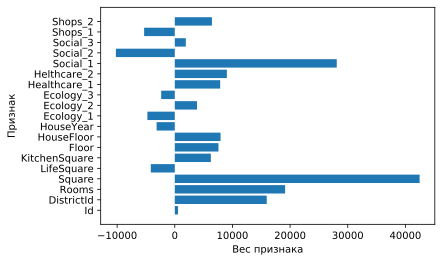

In [2721]:
from sklearn.linear_model import LinearRegression

# запускаем алгоритм линейной регресии для калибровки параметров
lr = LinearRegression()
lr.fit(X0_scaled, Y0_train)

# выводим в виде диаграммы на экран
koef = pd.DataFrame(lr.coef_.flatten())
koef['Name']= Data_head
koef.rename({ 0 : 'Вес'}, axis=1, inplace=True)
koef

rcParams['figure.figsize'] = 6, 4                      # меняем размер графиков по умолчанию
plt.barh(X_head, koef['Вес'])
plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

Иcпользуем алгоритм, показавший максимальный результат Gradient Boosting Regressor на полном объеме признаков

In [2722]:
from sklearn.ensemble import GradientBoostingRegressor

# формируем обучающую и 2 контрольные выборки из полного перечня признаков за исключением цены и идентификатора
Selection_head = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Healthcare_1', 'Helthcare_2','Social_1', 'Social_2', 'Social_3', 'Shops_1', 'Shops_2']
X0_train = X0_scaled[Selection_head]
X1_test  = X1_scaled[Selection_head]
X2_test  = X2_scaled[Selection_head]

# запускаем алгоритм Random Forest Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state = 16, max_depth=7, max_features=6) #(max_depth=16, max_features=14, n_estimators=150, random_state = 7)
gbr.fit(X0_train, Y0_train)
Y0_train_pred = gbr.predict(X0_train)
Y1_test_pred  = gbr.predict(X1_test)
Y2_test_pred  = gbr.predict(X2_test)

# оцениваем качество результата
print(r2_score(Y0_train, Y0_train_pred))
print(r2_score(Y1_test,  Y1_test_pred ))

# формируем csv-файл для экспорта на Каггл
prediction = pd.DataFrame(Y2_test_pred)
prediction['Id']= dt['Id']
prediction.rename({ 0 : 'Price'}, axis=1, inplace=True)
prediction.to_csv('pred_GBR.csv', index = False, columns = ['Id','Price'])

# формируем таблицу для анализа цен
check_test = pd.DataFrame({
    "Фактические цены": Y1_test,
    "Предсказанные цены": Y1_test_pred,
    "Ошибка": Y1_test - Y1_test_pred
})

check_test.head()

0.9278150772051055
0.7502486977286854


,Фактические цены,Предсказанные цены,Ошибка
1977,161434.877610,169865.998980,-8431.121370
3880,244348.950472,222107.364550,22241.585923
52,199215.452229,204872.852295,-5657.400066
2551,301664.078672,323348.682012,-21684.603339
2246,127298.614436,119298.804809,7999.809628
